In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
"""1.	Perform a complete data inspection including – (20 marks)
a.	Missing Data Treatment
b.	Descriptive Statistics of each variable (Eg. Boxplot, Histogram etc.)
c.	Visualization of all continuous variables
"""
data = pd.read_csv('Dataset_Day5.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
data.isna().sum()/len(data)*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [18]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

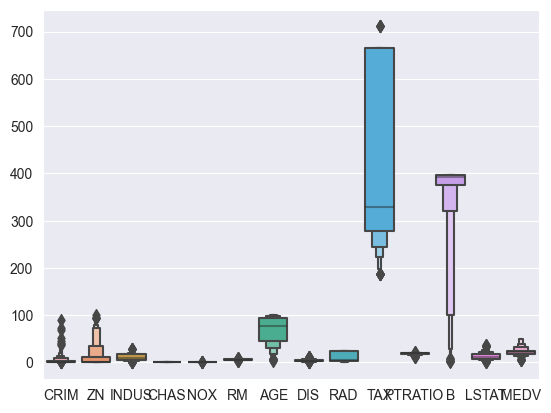

In [10]:
sns.boxenplot(data)

<Axes: >

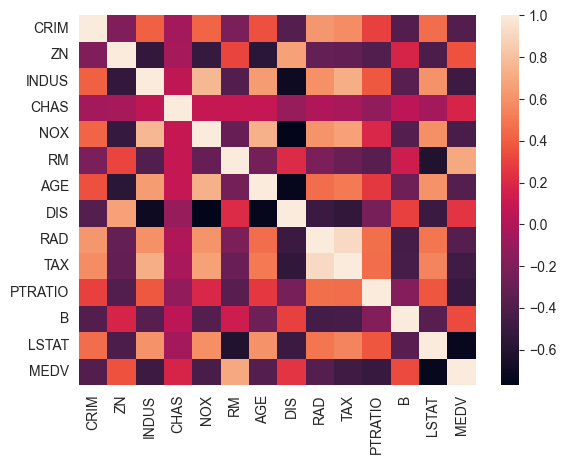

In [9]:
sns.heatmap(data.corr())

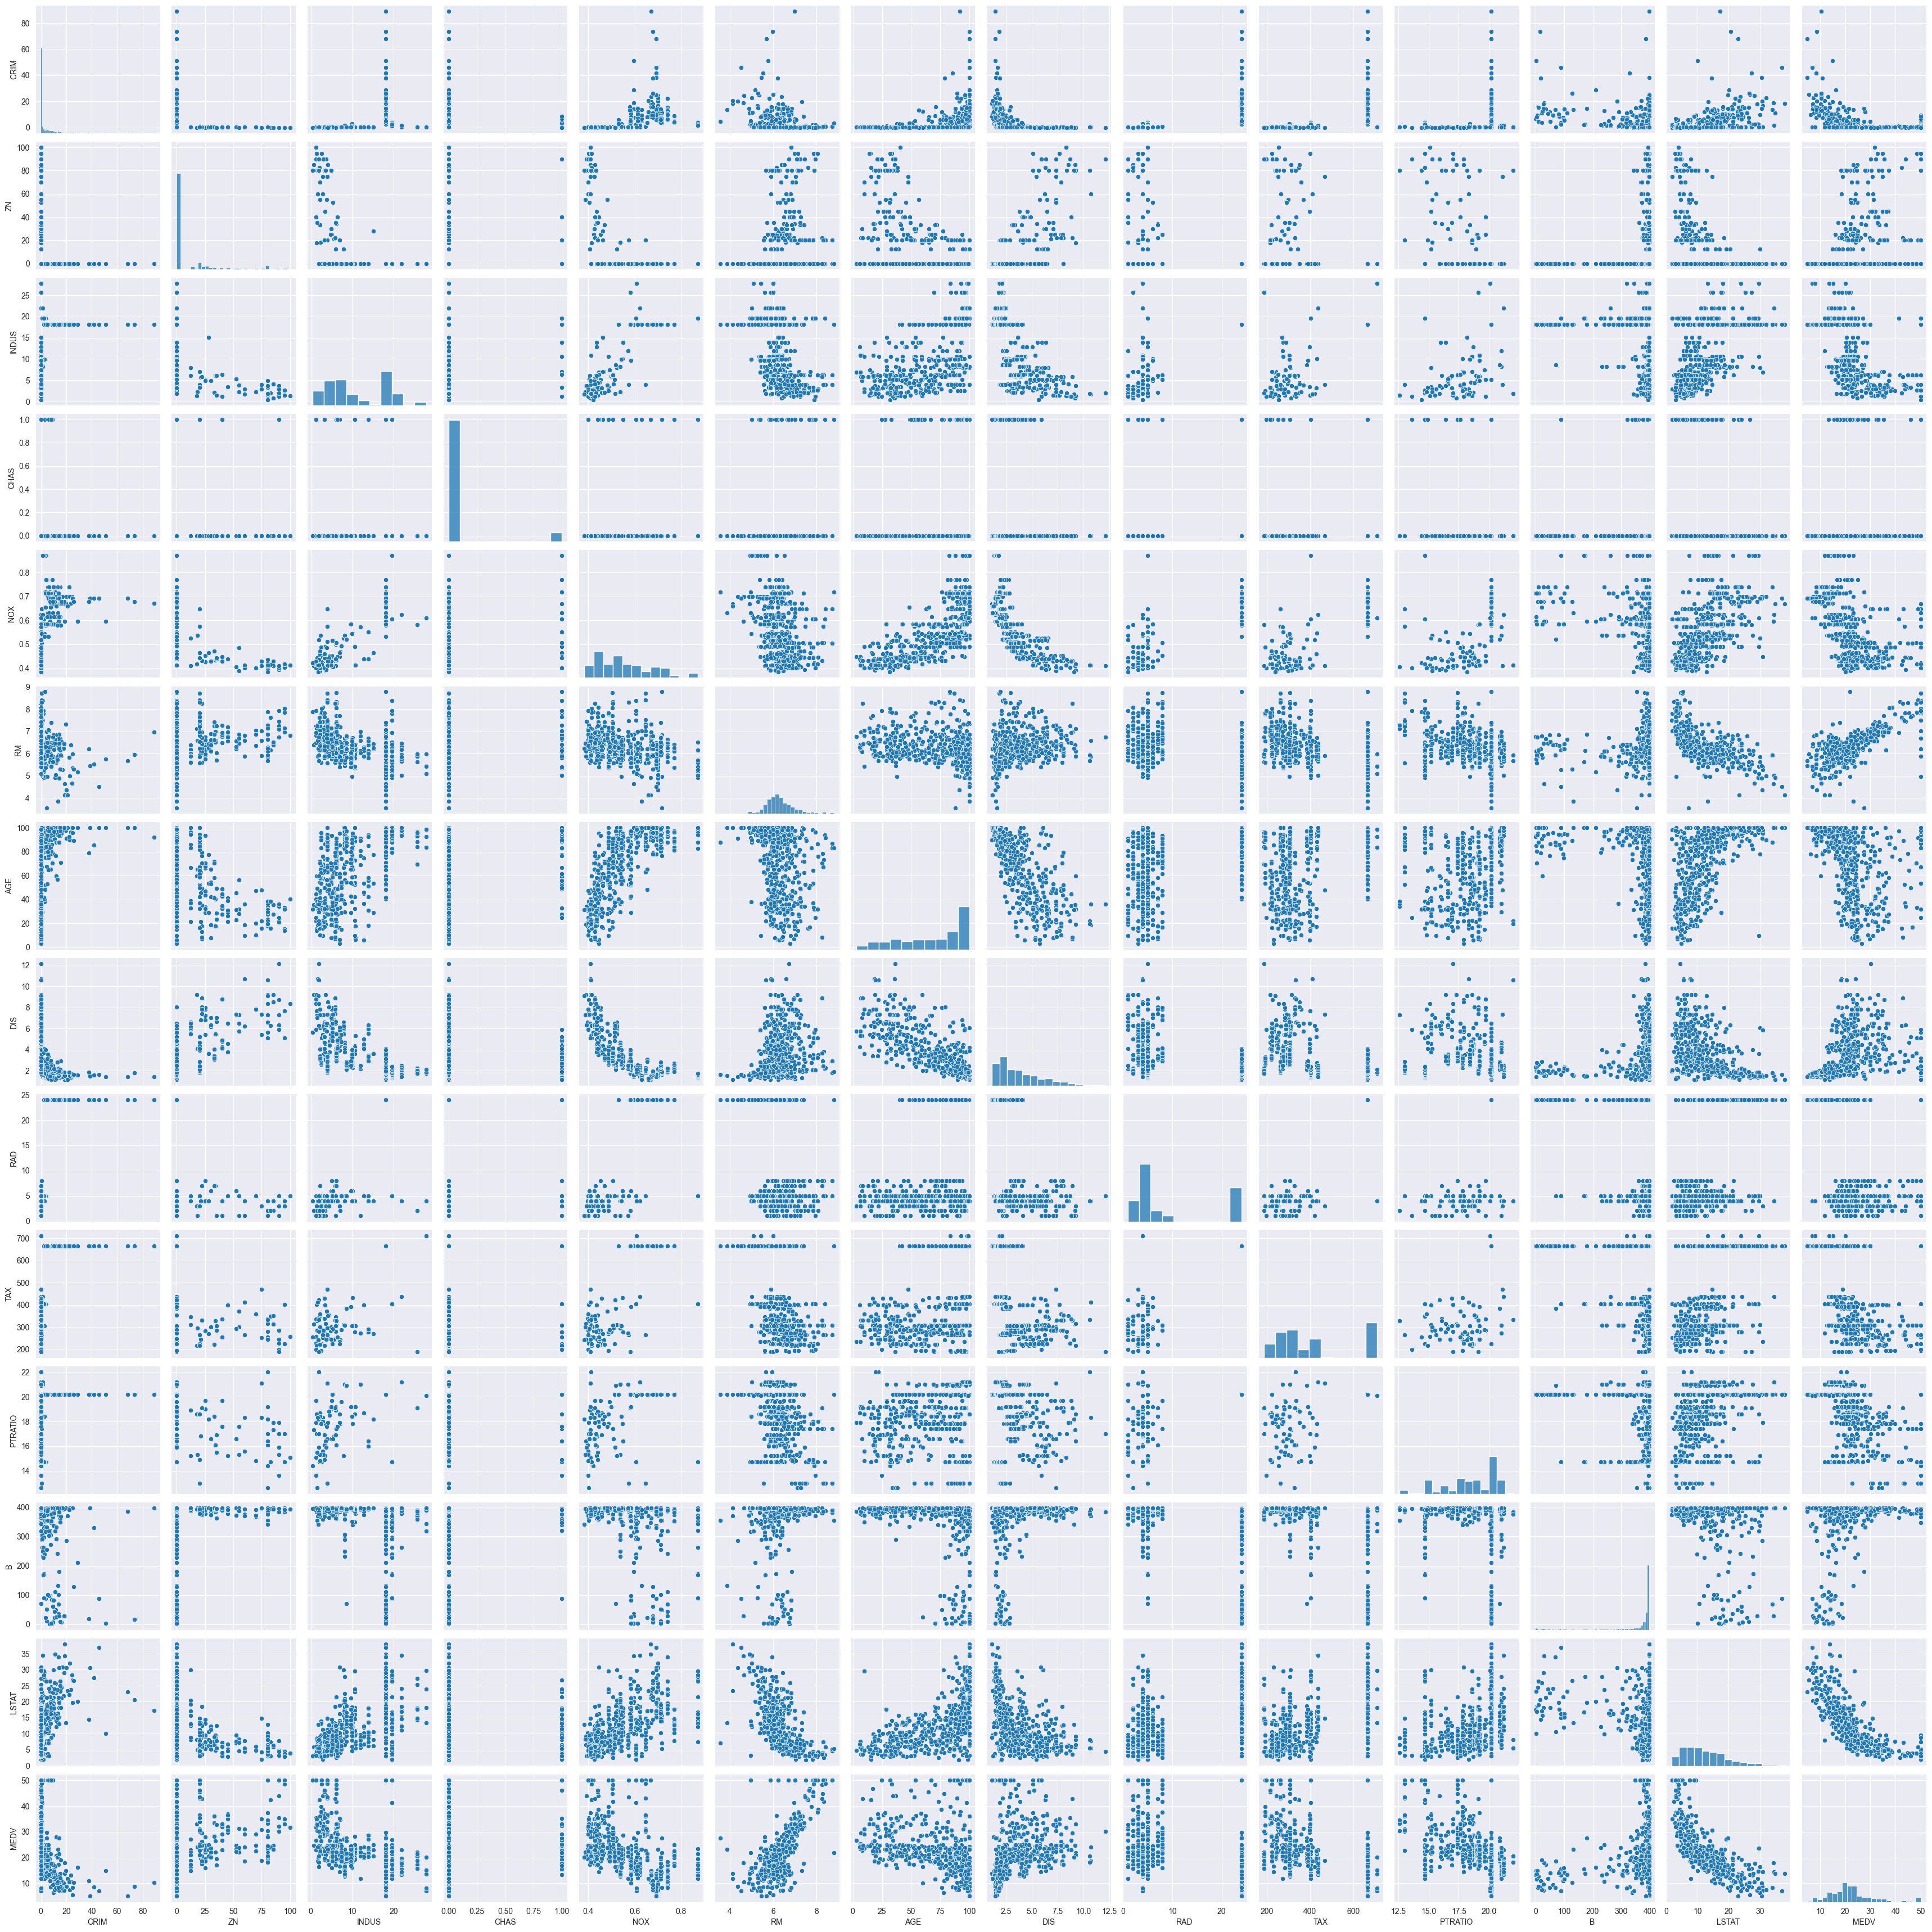

In [11]:
sns.pairplot(data)

In [38]:
""""2.	Create a simple linear regression model that quantitatively relates ‘MEDV’ with ‘RM’. (10 marks)
a.	Share the model performance metrics and print the full regression model with coefficients.
b.	Use the model to predict the price of the house for ‘RM’ = 7
"""

X = pd.DataFrame(data['RM'])
Y = pd.DataFrame(data['MEDV'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
X_train.head()

,RM
182,7.155
155,6.152
280,7.820
126,5.613
329,6.333


In [39]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)


intercept = regression_model.intercept_
coefficient = regression_model.coef_[0]

print("Regression model: MEDV = ", intercept, " + ", coefficient, " * RM")


Mean Squared Error (MSE):  42.74963952740483
R-squared (R2):  0.38952758463985193
Regression model: MEDV =  [-35.92697627]  +  [9.30417153]  * RM


In [41]:
new_RM = 7
predicted_MEDV = regression_model.predict([[new_RM]])

print("Predicted MEDV for RM = 7: ", predicted_MEDV)

Predicted MEDV for RM = 7:  [[29.20222443]]


F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
""""3.	Create a simple linear regression model that quantitatively relates ‘MEDV’ with ‘DIS’. (10 marks)
a.	Share the model performance metrics and print the full regression model with coefficients.
b.	Use the model to predict the price of the house for ‘DIS’ = 15
"""

X = pd.DataFrame(data['DIS'])
Y = pd.DataFrame(data['MEDV'])
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
X_train.head()

,DIS
182,2.7006
155,1.7455
280,4.6947
126,1.7572
329,5.2146


In [43]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)

intercept = regression_model.intercept_
coefficient = regression_model.coef_[0]

print("Regression model: MEDV = ", intercept, " + ", coefficient, " * DIS")

Mean Squared Error (MSE):  67.2844102568222
R-squared (R2):  0.03916671813726291
Regression model: MEDV =  [18.78734243]  +  [1.09489544]  * RM


In [45]:
new_Dis = 15
predicted_MEDV = regression_model.predict([[new_Dis]])

print("Predicted MEDV for DIS = 15: ", predicted_MEDV)

Predicted MEDV for DIS = 15:  [[35.21077409]]


F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
